### Can we cluster airports based on their delay patterns?

We are curious if we can cluster airports based on DepDelay (Departure Delay) and ArrDelay (Arrival Delay)

We want to identify the best airports (low delay) and the less reliable airports (high delay). A third cluster will show mixed performance airports (medium delay)

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import graphviz

df = pd.read_csv('DelayedFlights.csv');


### Quick plotting settings

In [64]:
sns.set_theme(context='notebook', style='whitegrid')
plt.rcParams['figure.figsize'] = 6, 4

### Data Exploration

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [66]:
df.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


### Data Preprocessing

This dataset only has data from 2008, so we can drop that column

In [67]:
df = df.drop(['Year'], axis=1)

KMeans does not accept NaN values so we need to remove them from our input variables

In [68]:
df = df.dropna(subset=['DepDelay', 'ArrDelay'])


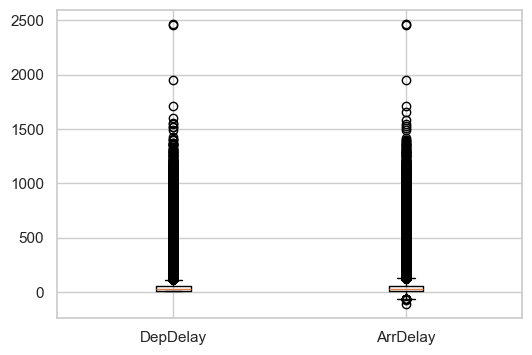

Number of outliers: 41989


In [69]:
# Checking for outliers
plt.boxplot([df['DepDelay'], df['ArrDelay']])
plt.xticks([1, 2], ['DepDelay', 'ArrDelay'])
plt.show()

from scipy import stats
z_scores = stats.zscore(df[['DepDelay', 'ArrDelay']])
outliers = (abs(z_scores) > 3).any(axis=1)
print("Number of outliers:", outliers.sum())

I want to try one more method to visualize outliers

In [70]:
df_num = df[['ArrDelay', 'DepDelay']]
numeric_vars = df_num.columns.values

from scipy.stats import zscore
zscore1 = lambda s: zscore(s, nan_policy='omit')

df_scaled = df_num.apply(zscore1)

In [71]:
df_scaled.apply(['min', 'max']).round(2).transpose()

,min,max
ArrDelay,-2.66,42.60
DepDelay,-0.70,45.51


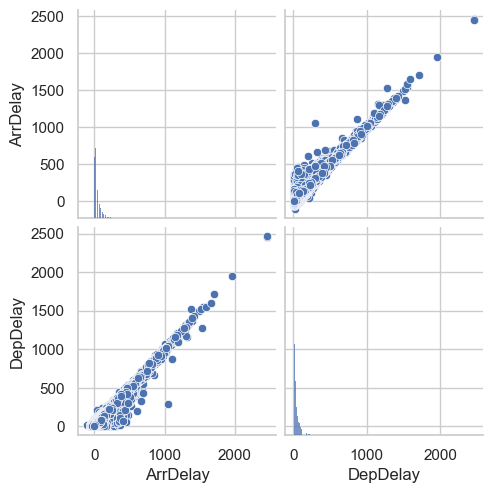

In [72]:
sns.pairplot(df_num);

In [73]:
q01, q99 = df[['DepDelay', 'ArrDelay']].quantile([0.01, 0.99]).values

df['DepDelay'] = df['DepDelay'].clip(q01[0], q99[0])
df['ArrDelay'] = df['ArrDelay'].clip(q01[1], q99[1])

X = StandardScaler().fit_transform(df[['DepDelay', 'ArrDelay']])
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)

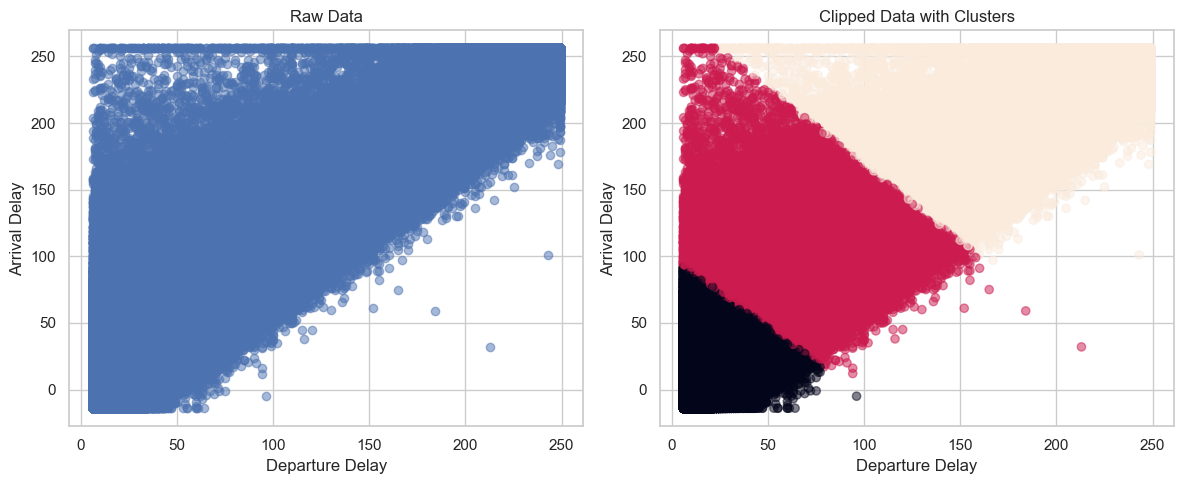

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(df['DepDelay'], df['ArrDelay'], alpha=0.5)
ax1.set_title('Raw Data')
ax1.set_xlabel('Departure Delay')
ax1.set_ylabel('Arrival Delay')

ax2.scatter(df['DepDelay'], df['ArrDelay'], alpha=0.5, c=clusters)
ax2.set_title('Clipped Data with Clusters')
ax2.set_xlabel('Departure Delay')
ax2.set_ylabel('Arrival Delay')

plt.tight_layout()
plt.show()


In [75]:
z_scores = stats.zscore(df[['DepDelay', 'ArrDelay']])
outliers_removed = df[abs(z_scores).max(axis=1) <= 3]

### Machine Learning

In [76]:
X = df[['DepDelay', 'ArrDelay']]

In [77]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

kmeans = KMeans(n_clusters=3,random_state=0)
cluster_nums = kmeans.fit_predict(X)

Sanity check: Are the clusters too skewed?

In [78]:
cluster_nums[:100]

print("Cluster 1:", np.bincount(cluster_nums)[0])
print("Cluster 2:", np.bincount(cluster_nums)[1]) 
print("Cluster 3:", np.bincount(cluster_nums)[2])

Cluster 1: 1377635
Cluster 2: 120338
Cluster 3: 430398


I mean, kinda, but this is real world data so this may not be too bad

In [79]:
pd.DataFrame(kmeans.cluster_centers_, columns=['RedMeat', 'Fr&Veg'])

,RedMeat,Fr&Veg
0,19.709954,16.621639
1,180.634177,186.922395
2,74.938469,79.331652


I also want to see the clusters

Text(0, 0.5, 'cluster number')

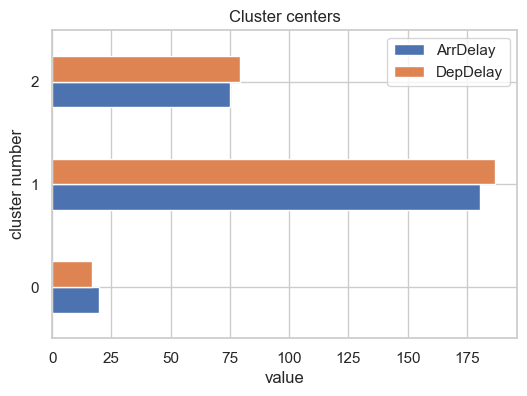

In [80]:
centers = pd.DataFrame(kmeans.cluster_centers_,
columns=['ArrDelay', 'DepDelay'])

centers.plot.barh()
plt.title('Cluster centers')
plt.xlabel('value'); plt.ylabel('cluster number')

Now in 2D

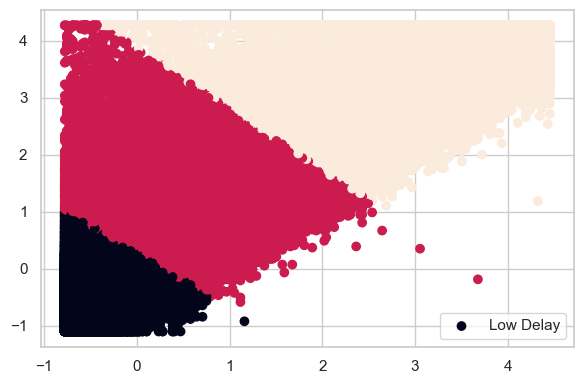

In [81]:
cluster_labels = {
    0: 'Low Delay',
    1: 'Medium Delay',
    2: 'High Delay'
}

labels = [cluster_labels[c] for c in clusters]

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, label=labels)
plt.legend(['Low Delay', 'Medium Delay', 'High Delay'])
plt.tight_layout()

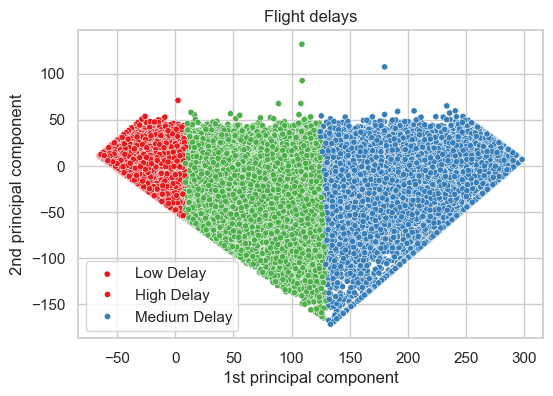

In [82]:
from sklearn.decomposition import PCA
X2 = PCA(n_components=2).fit_transform(X)
ax = sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=cluster_nums,
palette='Set1', s=20, legend=True)
ax.set_title('Flight delays')
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component');
plt.legend(['Low Delay', 'High Delay', 'Medium Delay']);

I don't think these predictor variable are working out. Im going to try distance and airport.

In [83]:
df_num = df[['Distance', 'DepDelay']]
numeric_vars = df_num.columns.values

from scipy.stats import zscore
zscore1 = lambda s: zscore(s, nan_policy='omit')

df_scaled = df_num.apply(zscore1)

In [84]:
airport_stats = df.groupby('Origin').agg({
   'Distance': 'mean',
   'CarrierDelay': 'mean'
}).dropna()

X_scaled = scaler.fit_transform(airport_stats)

In [85]:
kmeans = KMeans(n_clusters=3, random_state=0)
airport_stats['Cluster'] = kmeans.fit_predict(X_scaled)

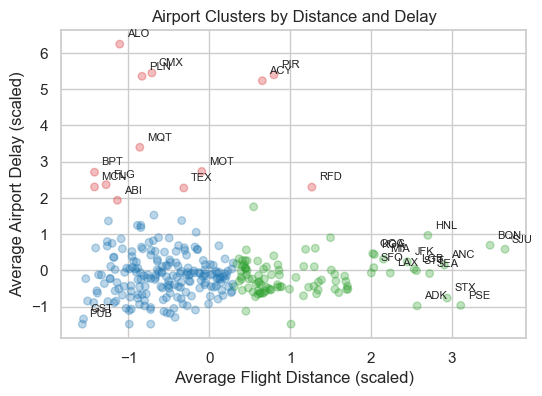

In [86]:
# Blue is decent, red is bad and blue is good airport
colors = ['#1f77b4', '#d62728', '#2ca02c']  # RGB

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
           c=[colors[i] for i in airport_stats['Cluster']], 
           s=30, alpha=0.3)

distances = np.sqrt(X_scaled[:, 0]**2 + X_scaled[:, 1]**2)
outlier_threshold = np.percentile(distances, 90)  # Top 10% as outliers
outliers = distances > outlier_threshold

for i, txt in enumerate(airport_stats.index):
    if outliers[i]:
        plt.annotate(txt, (X_scaled[i, 0], X_scaled[i, 1]), 
                    fontsize=8, xytext=(5, 5),
                    textcoords='offset points')

plt.xlabel('Average Flight Distance (scaled)')
plt.ylabel('Average Airport Delay (scaled)')
plt.title('Airport Clusters by Distance and Delay')
plt.show();